# Practical 6: Image classification

In this practical, you will build a model for hand-written digit classification on the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. The MNIST dataset is a famous benchmark dataset for machine learning. It consists of pairs of images and labels (10 classes, from 0 to 9). It looks like this.

![](mnist.png)

You model, once trained, will be able to predict for each image, what the digit is. You can use any classification model from the [sklearn](https://scikit-learn.org) library.

In [3]:
# Import libaries (provided)
import numpy as np
import pandas as pd
import gzip
import os
import struct
import matplotlib.pyplot as plt
import sklearn
from sklearn import neighbors, ensemble, svm, metrics
import time

In [4]:
# Functions for loading MNIST image data (provided)
def extract_images(f_name):
    """ Extract the images into a 2D uint8 numpy array [index, rows x cols]. """
    print('Extracting', f_name)
    with gzip.open(f_name, 'rb') as f:
        # Read file header
        buffer = f.read(16)
        magic, num_images, rows, cols = struct.unpack(">IIII", buffer)
        if magic != 2051:
            raise ValueError('Invalid magic number {0} in MNIST image file {1}.'.format(magic, f_name))

        # Read data
        buffer = f.read(rows * cols * num_images)
        data = np.frombuffer(buffer, dtype=np.uint8)
        data = data.reshape(num_images, rows * cols)
        return data


# Functions for loading MNIST label data (provided)
def extract_labels(f_name):
    """ Extract the labels into a 1D uint8 numpy vector [index,]. """
    print('Extracting', f_name)
    with gzip.open(f_name, 'rb') as f:
        # Read file header
        buffer = f.read(8)
        magic, num_items = struct.unpack(">II", buffer)
        if magic != 2049:
            raise ValueError('Invalid magic number {0} in MNIST label file {1}.'.format(magic, f_name))

        # Read data
        buffer = f.read(num_items)
        data = np.frombuffer(buffer, dtype=np.uint8)
        return data

## 1. Load and browse data.

The MNIST dataset is split into a training set (60,000 samples) and a test set (10,000 samples). In total, there are 4 files.

* `train-images-idx3-ubyte.gz`: training images
* `train-labels-idx1-ubyte.gz`: training labels
* `t10k-images-idx3-ubyte.gz`: test images
* `t10k-labels-idx1-ubyte.gz`: test labels

#### 1.1 Load data (provided).

In [5]:
# Training set
X_train = extract_images('train-images-idx3-ubyte.gz')
y_train = extract_labels('train-labels-idx1-ubyte.gz')

# Test set
X_test = extract_images('t10k-images-idx3-ubyte.gz')
y_test = extract_labels('t10k-labels-idx1-ubyte.gz')

Extracting train-images-idx3-ubyte.gz
Extracting train-labels-idx1-ubyte.gz
Extracting t10k-images-idx3-ubyte.gz
Extracting t10k-labels-idx1-ubyte.gz


#### 1.2 Print out the shapes of the four arrays.

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


#### 1.3 For the first 25 samples in the training set, show their images and corresponding labels.

Hint: Each image is of size 28 by 28. You need to reformat the correct shape before displaying.

TypeError: Invalid shape (784,) for image data

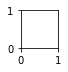

In [7]:
X_train2=X_train.reshape(60000, 28, 28)

for i in range(25):
    #plt.imshow(X_train[i])
    label=y_train[i]
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i])
    plt.title(label)
    plt.axis("off")
     
    
plt.tight_layout(pad=0.5) #creates space 

In [8]:
print(X_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### 1.4 For each of the 10 classes (digit 0 to 9), count the number of samples in the training and test sets.

In [29]:
for digit in range(10):
    print(digit, np.sum(y_test==digit))

0 980
1 1135
2 1032
3 1010
4 982
5 892
6 958
7 1028
8 974
9 1009


In [30]:
for digit in range(10):
    print(digit, np.sum(y_train==digit))

0 5923
1 6742
2 5958
3 6131
4 5842
5 5421
6 5918
7 6265
8 5851
9 5949


## 2. Analyse data.

#### 2.1 Here, you need to train a classification model on the training set, then apply it to the test set. Most [sklearn](https://scikit-learn.org) classifiers require two inputs for training a model, respectively features X and labels y.

X: N x M matrix, N denoting the number of samples, M denoting the number of features for each sample.

y: N x 1 vector, each element recording the label of a sample.

Since we have already prepared the data in this format, you only need to train the model. You can use any classification model supported by sklearn, including

* [K nearest neighbour classifier](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors)
* [Random forest classifier](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)
* [Support vector machine classifier](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm)
* or any other models

Since in today's lecture, we just discussed the nearest neighbour method. Why not try this?

ALso, please use the `time` function to count how long it takes for training.

In [11]:
start= time.time()
K=1 #comparing one number against 1
model=neighbors.KNeighborsClassifier(K)
model.fit(X_train, y_train)
print('{0} seconds'.format(time.time()-start))

19.884896993637085 seconds


#### 1.2 Apply the model onto the first `100` samples in the test set. Count how long it takes.

In [12]:
start= time.time()
print(model.predict(X_test[:100]))
print('{0} seconds'.format(time.time()-start))

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
6.727250576019287 seconds


#### 1.3 What is the classification accuracy for the first 100 test samples?

Accuracy is defined as the percentage of correctly classified samples.

In [13]:
pred_x = model.predict(X_test[:1000])
res = np.sum(y_test[:1000]==pred_x)
print(res/1000)

0.962


#### 1.4 Display the wrongly classsified images, their prediction results and ground truth.

(array([115, 195, 241, 268, 300, 320, 321, 341, 358, 381, 412, 444, 445,
       447, 464, 479, 495, 551, 578, 582, 583, 593, 646, 684, 689, 717,
       726, 740, 839, 844, 881, 924, 938, 939, 947, 951, 956, 957],
      dtype=int64),)


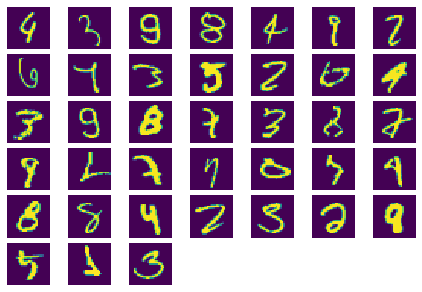

In [14]:
array_wrong=(np.nonzero(y_test[:1000]!=pred_x))
X_test_r=X_test.reshape(10000,28,28)
plt_idx=1

print(array_wrong)

for i in array_wrong[0]:
    plt.subplot(6,7,plt_idx)
    plt_idx +=1
    plt.imshow(X_test_r[i])
    plt.axis('off')
    plt.tight_layout(pad=0.5)